In [1]:
import sys
sys.path.append('C://Users/Wian/Documents/BEng(Hons)/CBT/Skogestad-Python')
# sys.path.append('/home/wian/Documents/BEng_Hons/Skogestad-Python/')

In [2]:
import utils
import numpy
import matplotlib.pyplot as plt
import sympy
sympy.init_printing()
%matplotlib inline

In [3]:
G11 = utils.tf([4.29], [6.7, 1])#, deadtime = 2.6)
G12 = utils.tf([-2.38], [8.64, 1])#, deadtime = 3.5)
G13 = utils.tf([-2.156], [9.06, 1])#, deadtime = 1)
G21 = utils.tf([7.215], [3.25, 1])#, deadtime = 6.5)
G22 = utils.tf([-9.218], [5.0, 1])#, deadtime = 3)
G23 = utils.tf([-2.156], [9.06, 1])#, deadtime = 1)
G31 = utils.tf([-0.5635], [8.15, 1])#, deadtime = 9.2)
G32 = utils.tf([0.451143], [10.9, 1])#, deadtime = 9.4)
G33 = utils.tf([1.1*10.1, 1.1*0.87], [3.89*18.8, 18.8+3.89, 1])#, deadtime = 1)

In [4]:
G = utils.mimotf([[G11, G12, G13], [G21, G22, G23], [G31, G32, G33]])

In [5]:
Poles, Zeros, _ = utils.poles_and_zeros_of_square_tf_matrix(G)
Zeros

array([-0.30769231, -0.25706941, -0.2       , -0.14925373, -0.12269939,
       -0.11574074, -0.11037528, -0.09174312, -0.05319149])

In [21]:
Zeros1 = utils.zeros(G)
Poles1 = utils.poles(G)
RHP = [Poles1[6], Poles1[7]]
RHP

[(0.03627000059205554+0.22946352507503165j),
 (0.03627000059205554-0.22946352507503165j)]

In [43]:
In = numpy.array([utils.pole_zero_directions(G, RHP, 'p')[0][1], utils.pole_zero_directions(G, RHP, 'p')[1][1]])
Out = numpy.array([utils.pole_zero_directions(G, RHP, 'p')[0][2], utils.pole_zero_directions(G, RHP, 'p')[1][2]])
numpy.abs(In), numpy.angle(In)*180/numpy.pi

(array([[[0.7080637 ],
         [0.69320203],
         [0.13459842]],
 
        [[0.7080637 ],
         [0.69320203],
         [0.13459842]]]), array([[[-180.        ],
         [  10.05862181],
         [  19.61163973]],
 
        [[-180.        ],
         [ -10.05862181],
         [ -19.61163973]]]))

In [44]:
numpy.abs(Out), numpy.angle(Out)*180/numpy.pi

(array([[[0.28756685],
         [0.95687031],
         [0.04128584]],
 
        [[0.28756685],
         [0.95687031],
         [0.04128584]]]), array([[[ 130.98234336],
         [ 146.03319576],
         [ -48.86530233]],
 
        [[-130.98234336],
         [-146.03319576],
         [  48.86530233]]]))

Text(0, 0.5, 'Imaginary Axis')

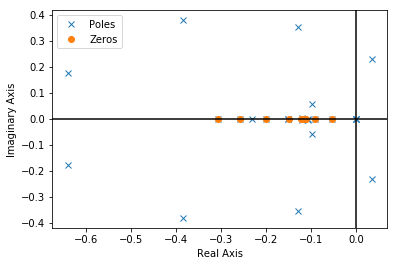

In [30]:
plt.plot(numpy.real(Poles1), numpy.imag(Poles1), 'x', label="Poles")
plt.plot(numpy.real(Zeros), numpy.imag(Zeros), 'o', label="Zeros")
plt.axhline([0], color = 'k')
plt.axvline([0], color = 'k')
plt.legend(loc = 0)
plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")

In [34]:
def sinusoid(omega, r):
    gain = numpy.abs(r)
    phase = numpy.angle(r)
    return gain*numpy.sin(ts*omega + phase)

In [35]:
ts = numpy.linspace(0,10,1000)

ValueError: shapes (3,1) and (3,1000) not aligned: 1 (dim 1) != 3 (dim 0)

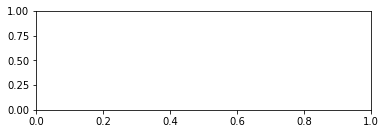

In [36]:
plt.subplot(2,1,1)
plt.plot(ts, sinusoid(10, In[0]))
plt.plot(ts, sinusoid(10, In[1]))
plt.plot(ts, sinusoid(10, In[2]))
# plt.subplot(2,1,2)
# plt.plot(ts, sigma[0]*sinusoid(omega_c, U[0,index]))
# plt.plot(ts, sigma[0]*sinusoid(omega_c, U[1,index]))
# plt.plot(ts, sigma[0]*sinusoid(omega_c, U[2,index]))